In [2]:
import cv2
import numpy as np
from commonfunctions import *
import imutils

3.8974358974358974


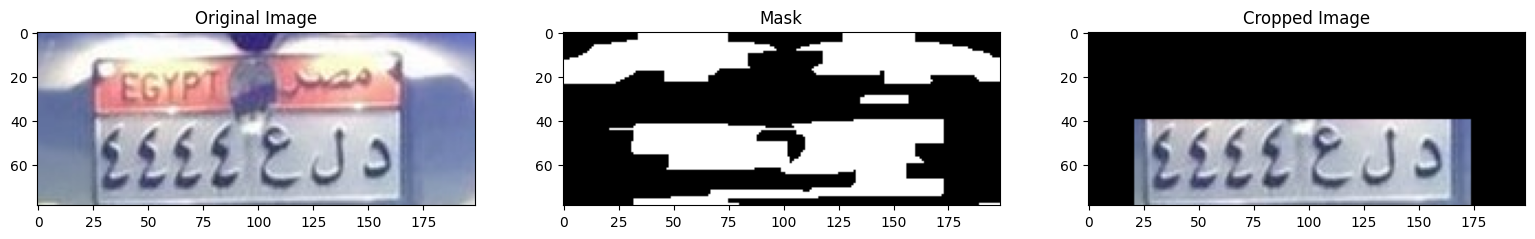

In [222]:
img_path = 'Results3\\0085.jpg'
image = cv2.imread(img_path)  # Load your image

image_copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
# enhance contrast using histogram equalization
# gray = cv2.equalizeHist(gray)
gray_original = gray.copy()
img_threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
img_threshold2 = img_threshold.copy()

## apply closing
img_threshold = cv2.erode(img_threshold, np.ones((6, 6), np.uint8), iterations=1)
img_threshold = cv2.dilate(img_threshold, np.ones((1, 20), np.uint8), iterations=1)


# Find contours of the masked region
contours, _ = cv2.findContours(img_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# get max contour
max_contour = max(contours, key=cv2.contourArea)
# get bounding box
x, y, w, h = cv2.boundingRect(max_contour)
# create an array of zeros with the same shape as the image

# check for aspect ratio
aspect_ratio = w / h
print(aspect_ratio)
if 2.2 < aspect_ratio < 5:
    mask = np.zeros_like(image_copy)
    cv2.rectangle(mask, (x, y), (x + w, y + h), (255, 255, 255), -1)
    masked_image = cv2.bitwise_and(image_copy, mask)
else:
    masked_image = image_copy
    print("No colored part detected. The whole image will be used.")
    



show_images([image, img_threshold, masked_image], ["Original Image", "Mask", "Cropped Image"])
# show_images([gray, img_threshold], ["gray", "blackHat"])


2.518987341772152
No colored part detected. The whole image will be used.


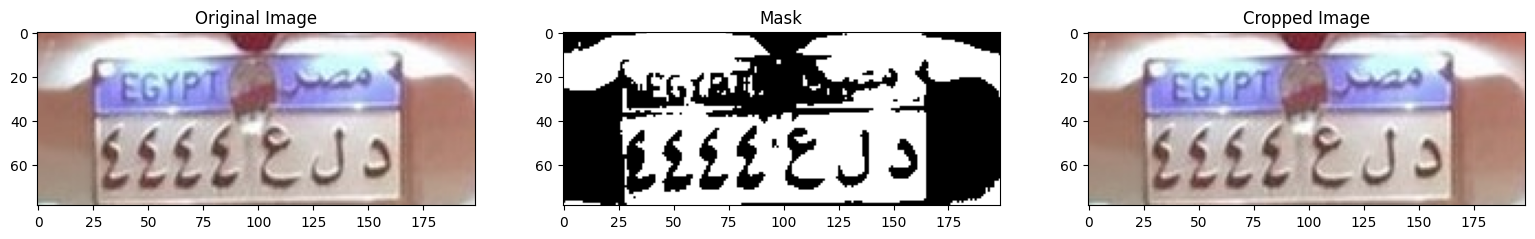

In [113]:
image = cv2.imread(img_path)  # Load your image

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lower_color = np.array([150, 150, 150])
upper_color = np.array([255, 255, 255])

# Create a mask for the colored part
mask = cv2.inRange(hsv, lower_color, upper_color)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Find contours of the masked region
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# get prespective transform


# Find the top-most contour (the colored region should be at the top)
if contours:
    # Get the bounding box of the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    # check for aspect ratio
    aspect_ratio = w / h
    print(aspect_ratio)
    if 3 < aspect_ratio < 8:
        cropped_image = image * mask[:, :, np.newaxis]
    else:
        cropped_image = image
        print("No colored part detected. The whole image will be used.")
else:
    print("No colored part detected. The whole image will be used.")
    cropped_image = image

# Save or display the results
# convert image to RGB (OpenCV uses BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
show_images([image, mask, cropped_image], ["Original Image", "Mask", "Cropped Image"])

In [102]:
img_path = 'Results3\\0085.jpg'
